# **Title: Melody Metrics -  Predicting Popular Songs Based On Audio Features**



### **Group 09**

### **Group members**

- Prabhleen Kaur (0857194)
- Rajwinder Kaur (0831280)
- Vindya Senadheera (0857437)
- STM Chathurangi (0850982)
- Ajay Haji Korbe (0852660)

## **Import Data**

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel(r"C:\Vindya\Data Analitics for Business\Semester 4\Capstone Project II\Dataset\Combined Spotfy Raw Data.xlsx") #read the excel dataset


In [4]:
df.columns #preview the columns

Index(['track_name', 'artist_name', 'artist_popularity', 'artist_genres',
       'country_name', 'album_name', 'track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

## **Understand Data**

In [5]:
df.head() #preview first few rows

,track_name,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Hamari Adhuri Kahani (Title Track),Jeet Gannguli,68,bollywood,India,Hamari Adhuri Kahani (Original Motion Picture ...,72,0.220,0.362,0,-7.571,1,0.0316,0.845,0.000000,0.1330,0.198,72.516,398799,4
1,Jo Tum Mere Ho,Anuv Jain,75,bollywood,India,Jo Tum Mere Ho,83,0.460,0.302,1,-12.934,0,0.0398,0.661,0.000000,0.2930,0.176,123.871,251814,5
2,Aaj Bhi 2,Vishal Mishra,78,bollywood,India,Aaj Bhi 2,69,0.452,0.328,1,-11.344,1,0.0300,0.665,0.000005,0.1040,0.258,102.084,259057,4
3,"Agar Tum Saath Ho (From ""Tamasha"")",Alka Yagnik,81,bollywood,India,Love Forever With Arijit Singh,69,0.562,0.519,3,-8.744,1,0.0326,0.557,0.000268,0.1720,0.415,122.925,341055,4
4,"Tenu Sang Rakhna (From ""Jigra"")",Achint,57,bollywood,India,"Tenu Sang Rakhna (From ""Jigra"")",61,0.604,0.354,2,-6.716,1,0.0249,0.845,0.000148,0.0921,0.277,110.036,249818,4


In [6]:
df.info() #preview the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         2408 non-null   object 
 1   artist_name        2408 non-null   object 
 2   artist_popularity  2409 non-null   int64  
 3   artist_genres      2409 non-null   object 
 4   country_name       2409 non-null   object 
 5   album_name         2408 non-null   object 
 6   track_popularity   2409 non-null   int64  
 7   danceability       2409 non-null   float64
 8   energy             2409 non-null   float64
 9   key                2409 non-null   int64  
 10  loudness           2409 non-null   float64
 11  mode               2409 non-null   int64  
 12  speechiness        2409 non-null   float64
 13  acousticness       2409 non-null   float64
 14  instrumentalness   2409 non-null   float64
 15  liveness           2409 non-null   float64
 16  valence            2409 

In [7]:
df.describe()

,artist_popularity,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000
mean,58.352013,46.241594,0.616074,0.576756,5.185554,-7.974372,0.631797,0.063945,0.397531,0.085447,0.163710,0.505344,119.651369,223337.011623,3.919054
std,28.375723,22.478777,0.141953,0.233966,3.557201,3.404541,0.482417,0.062534,0.327300,0.236692,0.132173,0.245697,28.277016,67984.785466,0.367500
min,0.000000,0.000000,0.213000,0.011900,0.000000,-28.276000,0.000000,0.023100,0.000006,0.000000,0.021900,0.037000,53.845000,37702.000000,1.000000
25%,35.000000,28.000000,0.515000,0.393000,2.000000,-9.696000,0.000000,0.032700,0.078500,0.000000,0.094900,0.305000,98.385000,179587.000000,4.000000
50%,64.000000,48.000000,0.621000,0.615000,5.000000,-7.344000,1.000000,0.042700,0.324000,0.000009,0.115000,0.489000,117.997000,215213.000000,4.000000
75%,83.000000,62.000000,0.723000,0.761000,8.000000,-5.531000,1.000000,0.063700,0.719000,0.001760,0.179000,0.707000,135.862000,252466.000000,4.000000
max,100.000000,100.000000,0.974000,0.994000,11.000000,-0.079000,1.000000,0.924000,0.992000,0.979000,0.992000,0.983000,220.081000,655440.000000,5.000000


- Track popularity: The range of popularity goes from 0 to 100, with most songs falling between 28 and
- Loudness: The average loudness is negative (-7.97 dB), and the minimum is very low (-28.28 dB), indicating that most songs are quite soft.
- Danceability and Energy: These have moderate averages (around 0.6 for danceability and 0.58 for energy), with values ranging from low to high.
- Duration_ms: The average song duration is around 3.72 minutes (223 seconds), with a minimum duration of 37 seconds and a maximum of over 10 minutes (655 seconds).
- Time_signature: Most songs have a time signature of 4/4 (the typical pop music rhythm).

In [8]:
# Use describe to see the statistical summary
describe_data = df.describe()

# Calculate the range for each numerical column (max - min)
range_values = describe_data.loc['max'] - describe_data.loc['min']

# Display the range of each numerical column
print("Range of numerical features:")
print(range_values)

Range of numerical features:
artist_popularity       100.000000
track_popularity        100.000000
danceability              0.761000
energy                    0.982100
key                      11.000000
loudness                 28.197000
mode                      1.000000
speechiness               0.900900
acousticness              0.991994
instrumentalness          0.979000
liveness                  0.970100
valence                   0.946000
tempo                   166.236000
duration_ms          617738.000000
time_signature            4.000000
dtype: float64


## **Clean Data**

In [9]:
df.isnull().sum() #check the null values

track_name           1
artist_name          1
artist_popularity    0
artist_genres        0
country_name         0
album_name           1
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [10]:
df.shape #check the shape of the dataset

(2409, 20)

In [11]:
df['artist_name'].value_counts() #get the value counts

artist_name
Criolo                    50
Jason Mraz                41
Jorge Drexler             37
BaianaSystem              29
Pritam                    27
                          ..
MoBlack                    1
Abdou Gambetta             1
Abdul Majeed Abdullah      1
Saif Nabeel                1
Limoblaze;Dj Horphuray     1
Name: count, Length: 927, dtype: int64

In [12]:
# prompt: need to remove null values

df.dropna(inplace=True)
df.isnull().sum()
df.shape


(2408, 20)

In [13]:
df.isnull().sum() #check the null values afater removing

track_name           0
artist_name          0
artist_popularity    0
artist_genres        0
country_name         0
album_name           0
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [14]:
# Find all duplicate rows
duplicates = df[df.duplicated()]
duplicates

,track_name,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
66,Aaj Bhi 2,Vishal Mishra,78,bollywood,India,Aaj Bhi 2,69,0.452,0.328,1,-11.344,1,0.0300,0.66500,0.000005,0.1040,0.258,102.084,259057,4
78,Children of the Sun,Alan Walker,82,acoustic,Norway,Children of the Sun,59,0.594,0.777,2,-4.552,1,0.0310,0.27300,0.000040,0.1120,0.318,130.982,218070,4
80,Yeh Dil Deewana,Sonu Nigam,77,bollywood,India,Yeh Dil Deewana,14,0.590,0.678,0,-6.047,1,0.0522,0.75600,0.000002,0.0586,0.757,89.979,209064,4
86,"Vekh Sohneyaa - From ""Call Me Bae""",Bombay the Artist,56,bollywood,India,"Vekh Sohneyaa (From ""Call Me Bae"")",68,0.715,0.673,4,-4.860,0,0.0593,0.27300,0.000000,0.1460,0.615,114.968,216465,4
87,Kinni Soni,Darshan Raval,77,bollywood,India,Kinni Soni,65,0.678,0.631,4,-6.866,0,0.0443,0.47000,0.000031,0.0971,0.222,104.017,241201,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,360,Charli xcx,89,pop,United Kingdom,360,62,0.857,0.620,0,-8.130,1,0.0472,0.64600,0.244000,0.0934,0.796,120.042,133805,4
746,You’re Losing Me (From The Vault),Taylor Swift,100,pop,United States,You're Losing Me (From The Vault),75,0.744,0.396,0,-13.712,1,0.0570,0.50900,0.003190,0.1210,0.180,102.969,277832,4
747,Summer's Gone,Monoir,46,pop,Romania,Summer's Gone,51,0.858,0.782,9,-3.569,1,0.0474,0.00568,0.011700,0.1480,0.185,127.967,152827,4
748,older,Isabel LaRosa,76,pop,United States,older,78,0.466,0.510,3,-7.310,0,0.0348,0.08420,0.000002,0.0912,0.418,67.513,137778,4


In [15]:
spotify = df.drop_duplicates()
spotify

,track_name,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Hamari Adhuri Kahani (Title Track),Jeet Gannguli,68,bollywood,India,Hamari Adhuri Kahani (Original Motion Picture ...,72,0.220,0.362,0,-7.571,1,0.0316,0.84500,0.000000,0.1330,0.198,72.516,398799,4
1,Jo Tum Mere Ho,Anuv Jain,75,bollywood,India,Jo Tum Mere Ho,83,0.460,0.302,1,-12.934,0,0.0398,0.66100,0.000000,0.2930,0.176,123.871,251814,5
2,Aaj Bhi 2,Vishal Mishra,78,bollywood,India,Aaj Bhi 2,69,0.452,0.328,1,-11.344,1,0.0300,0.66500,0.000005,0.1040,0.258,102.084,259057,4
3,"Agar Tum Saath Ho (From ""Tamasha"")",Alka Yagnik,81,bollywood,India,Love Forever With Arijit Singh,69,0.562,0.519,3,-8.744,1,0.0326,0.55700,0.000268,0.1720,0.415,122.925,341055,4
4,"Tenu Sang Rakhna (From ""Jigra"")",Achint,57,bollywood,India,"Tenu Sang Rakhna (From ""Jigra"")",61,0.604,0.354,2,-6.716,1,0.0249,0.84500,0.000148,0.0921,0.277,110.036,249818,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,You Are My Heart,Rex Williams,56,afrobeat,Brazil,Nigeria 70 - Lagos Jump,46,0.675,0.681,7,-7.458,1,0.0364,0.48100,0.023200,0.2250,0.604,97.442,193000,4
2405,Anbessa,AkalÃ© WubÃ©;Manu Dibango,69,afrobeat,Brazil,Sost,49,0.820,0.473,10,-7.300,0,0.0454,0.29300,0.861000,0.1360,0.645,120.066,221720,4
2406,Old Engine Oil,The Budos Band,94,afrobeat,Brazil,V,40,0.366,0.910,2,-6.157,1,0.0415,0.00119,0.834000,0.1010,0.322,92.940,191213,4
2407,Amoureux,Ilover,84,afrobeat,Brazil,Amoureux,20,0.703,0.859,6,-3.991,1,0.0752,0.22200,0.000000,0.1740,0.867,82.069,228115,4


In [16]:
# Check the data types to identify numerical columns
print(spotify.dtypes)

track_name            object
artist_name           object
artist_popularity      int64
artist_genres         object
country_name          object
album_name            object
track_popularity       int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms            int64
time_signature         int64
dtype: object


## **Check and Remove the Outliers**

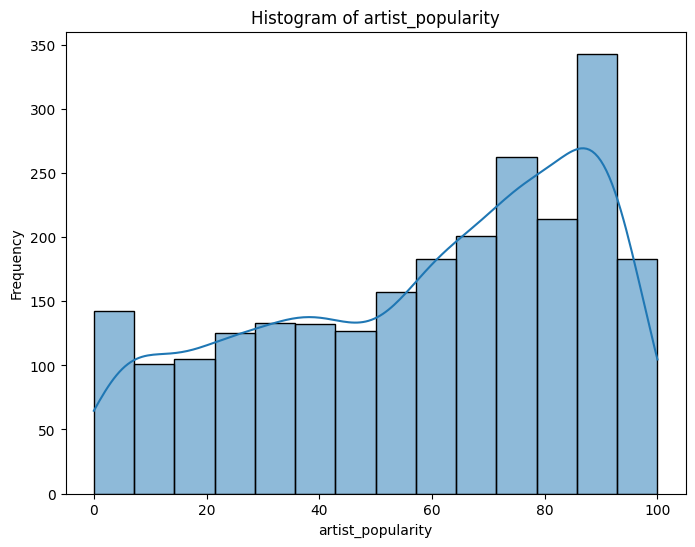

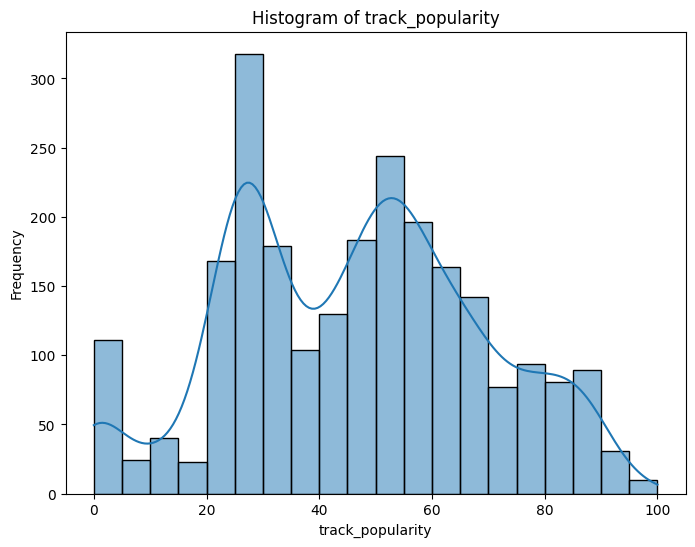

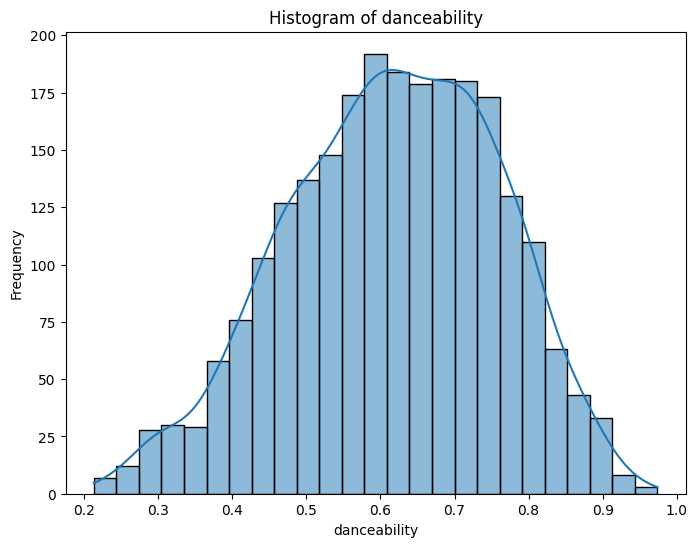

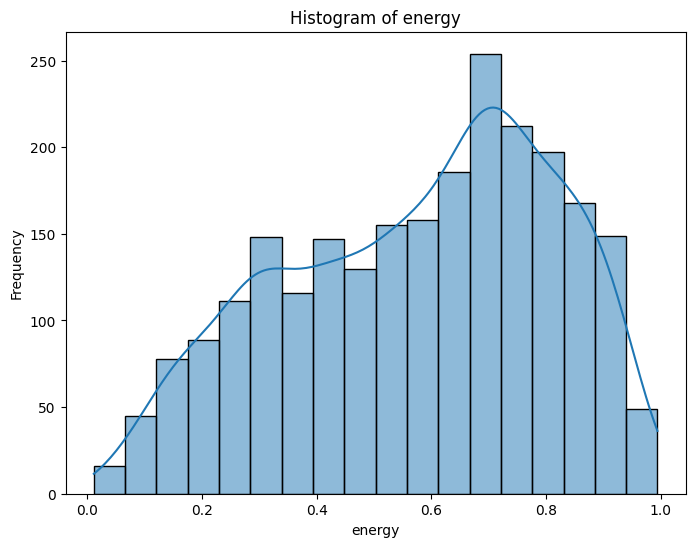

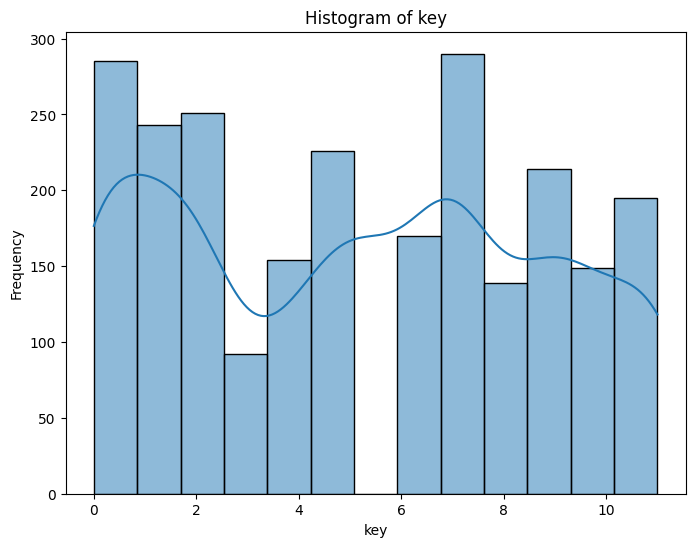

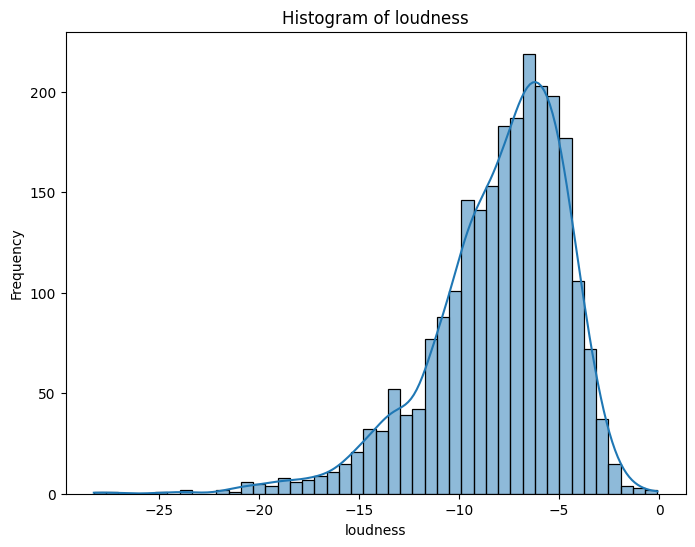

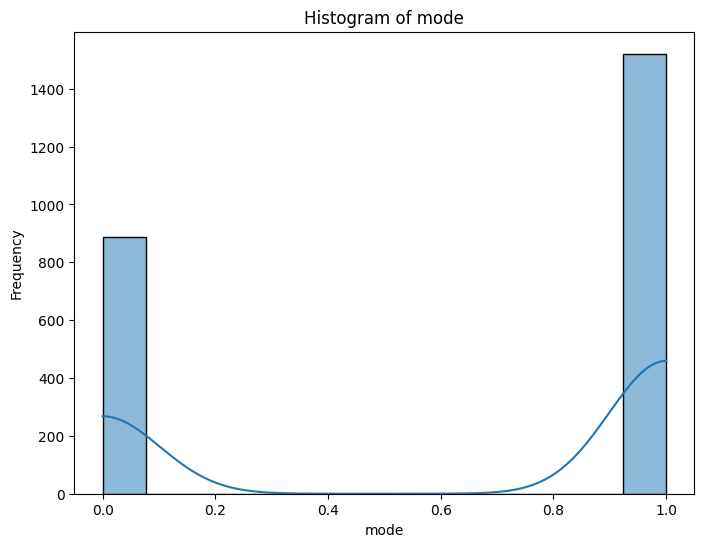

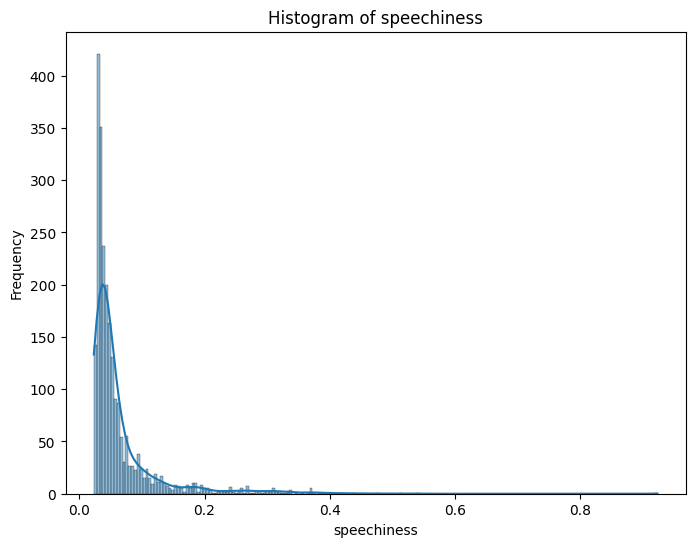

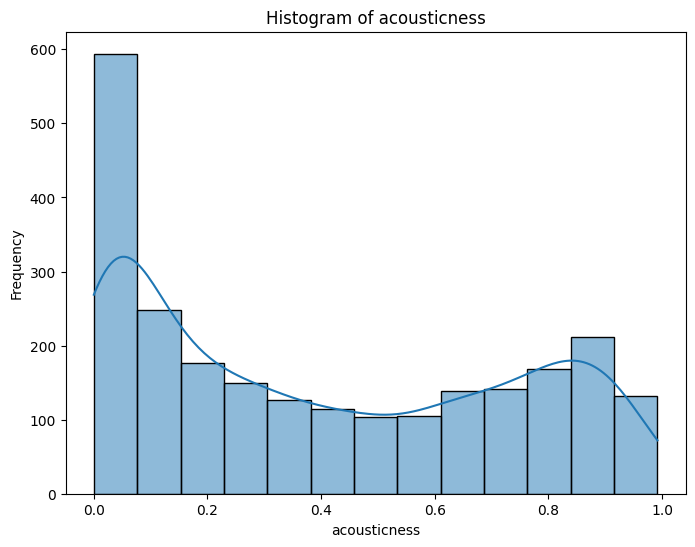

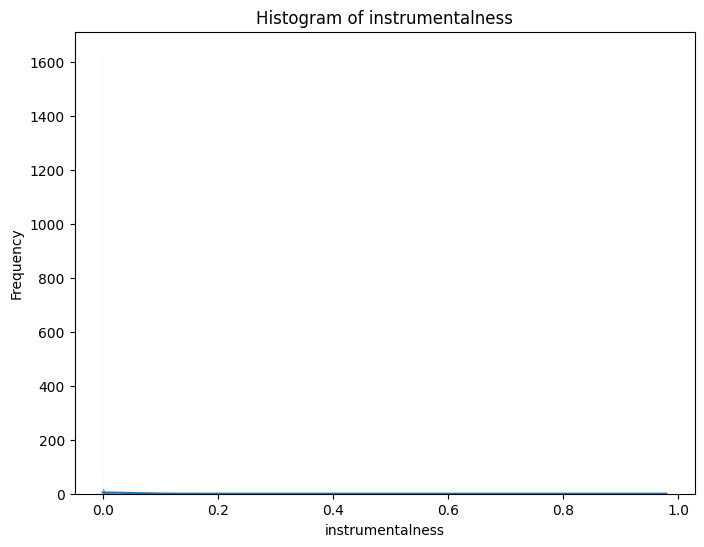

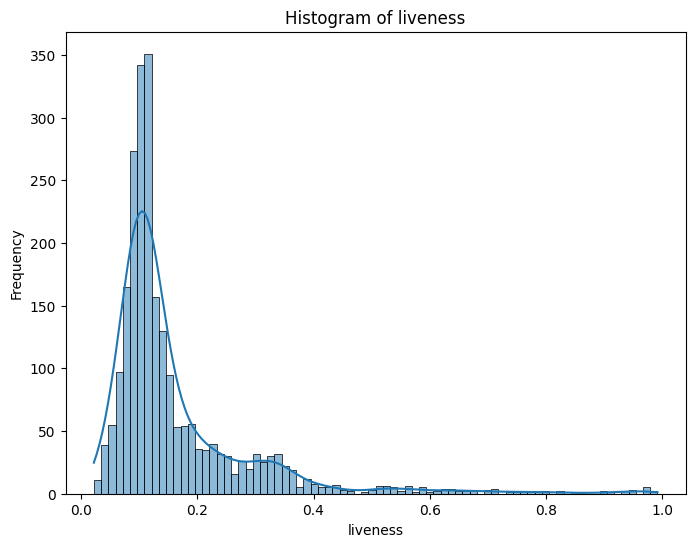

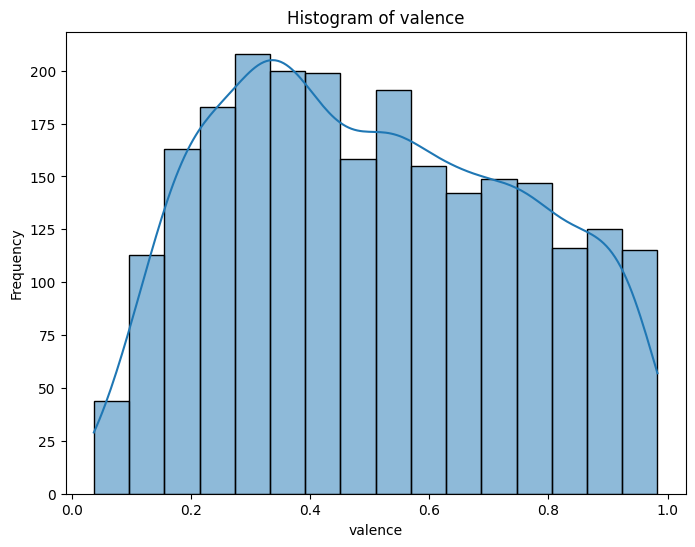

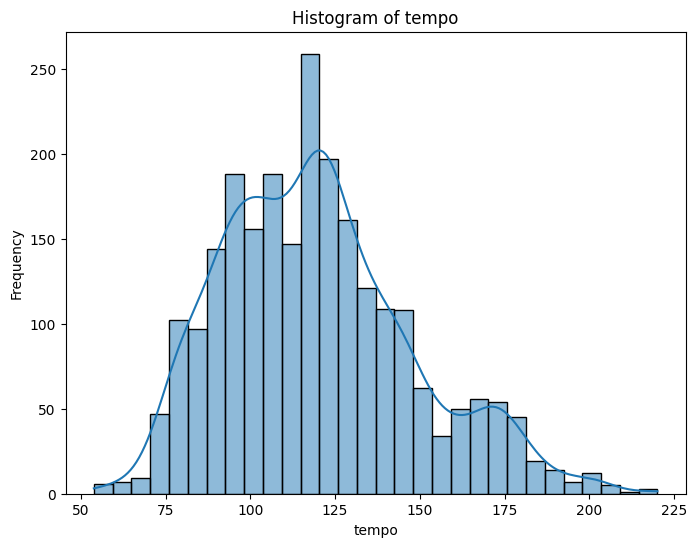

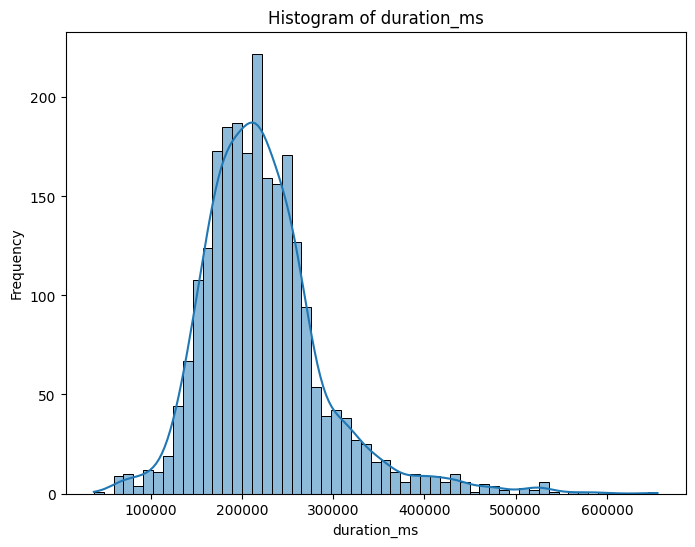

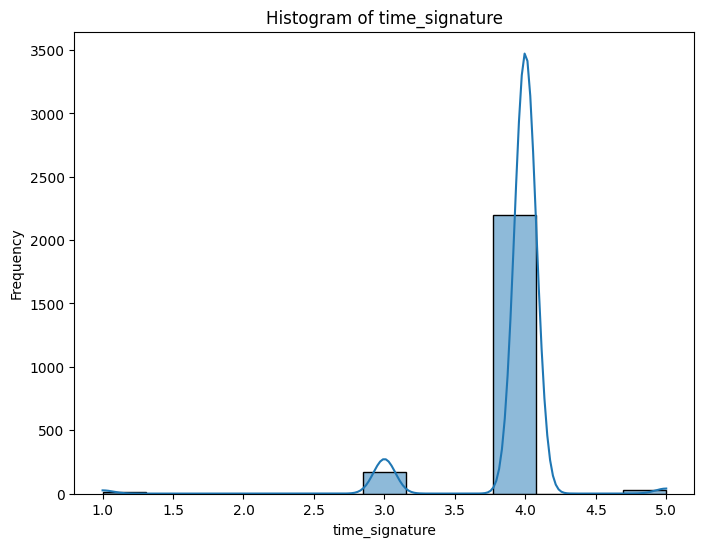

In [17]:
# plotting Histogram
numeric_cols = spotify.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(df[col], kde=True)  # kde=True adds a kernel density estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

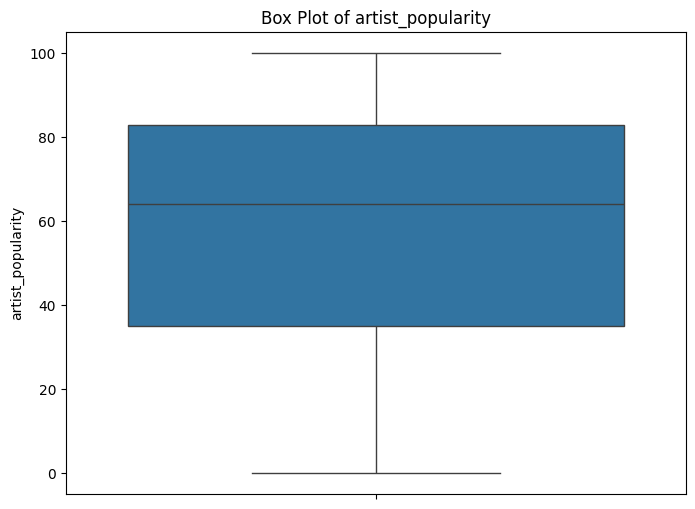

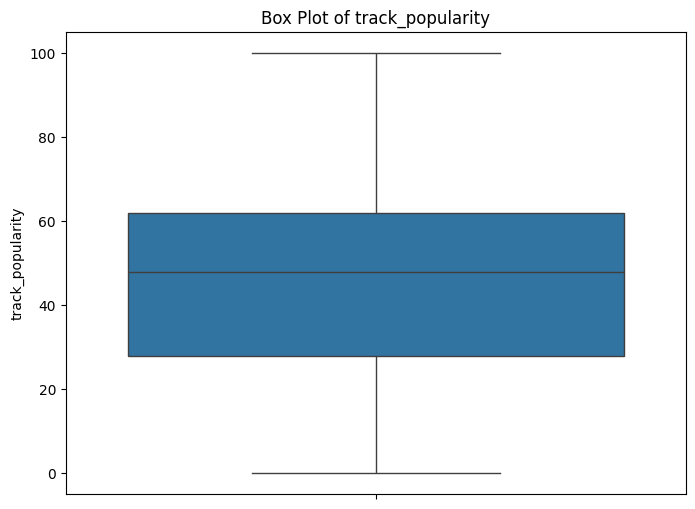

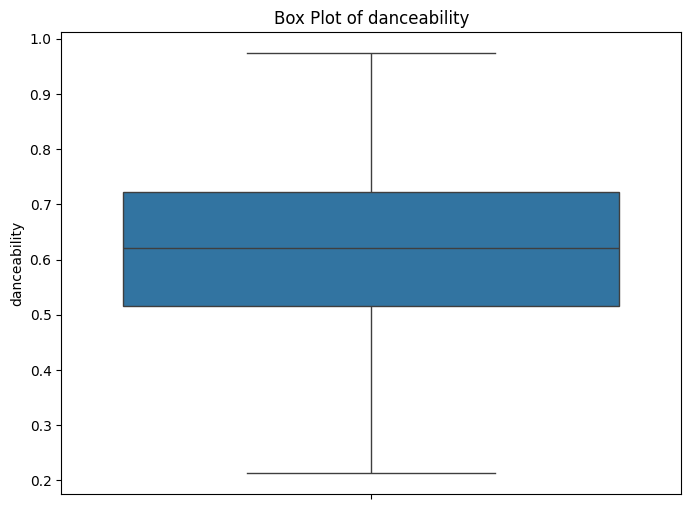

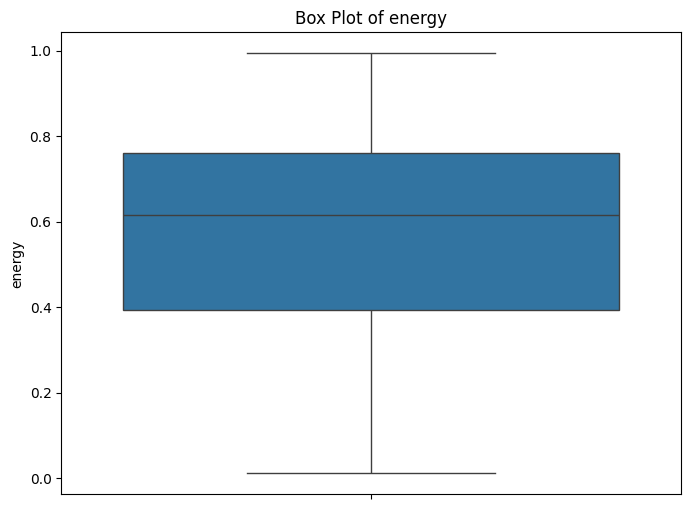

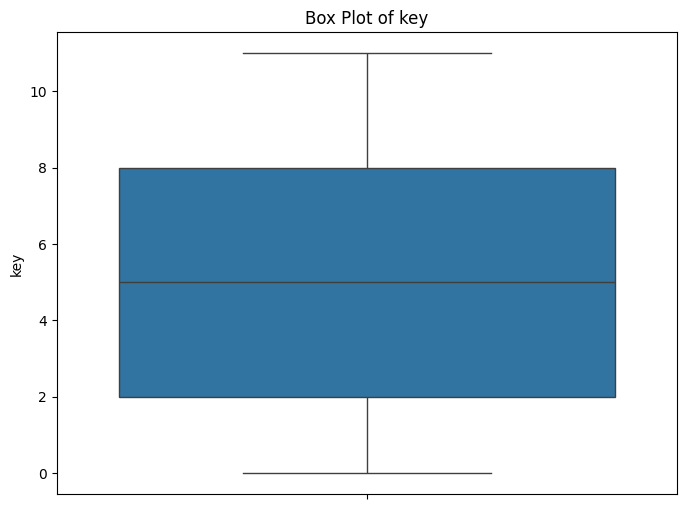

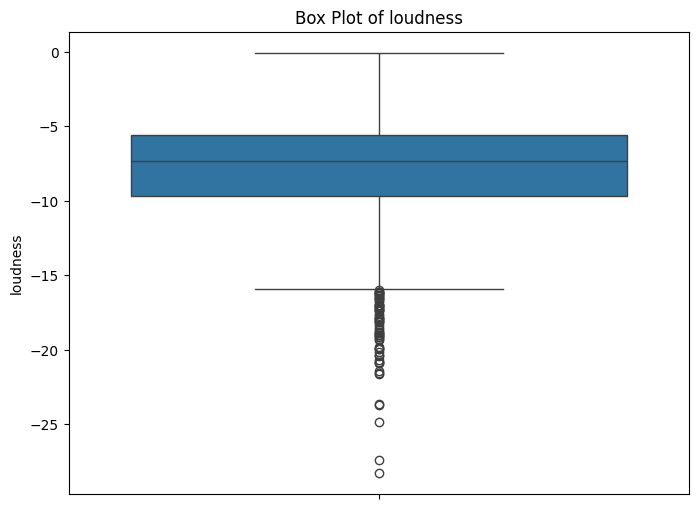

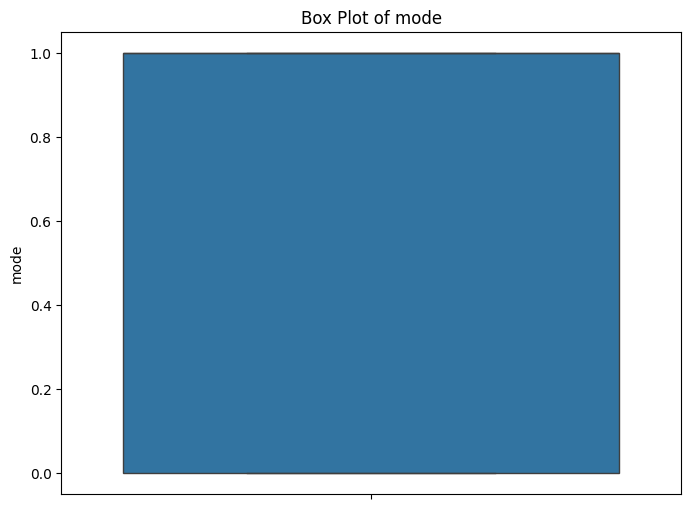

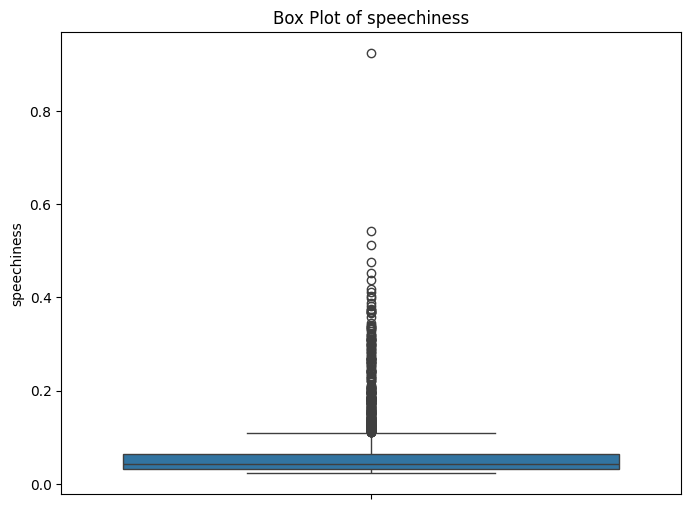

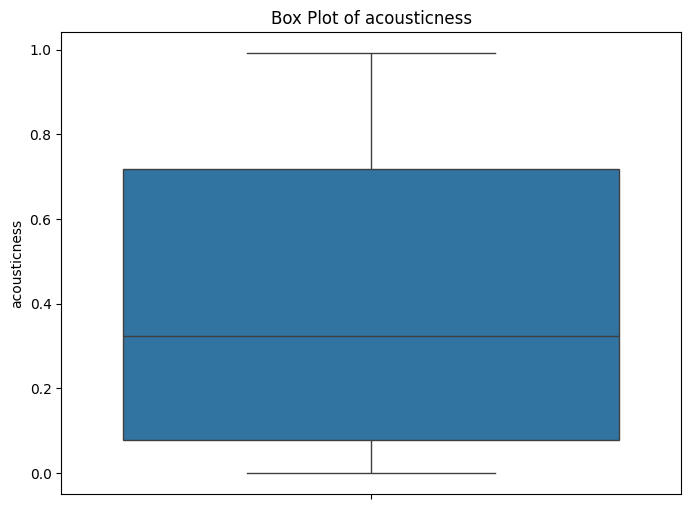

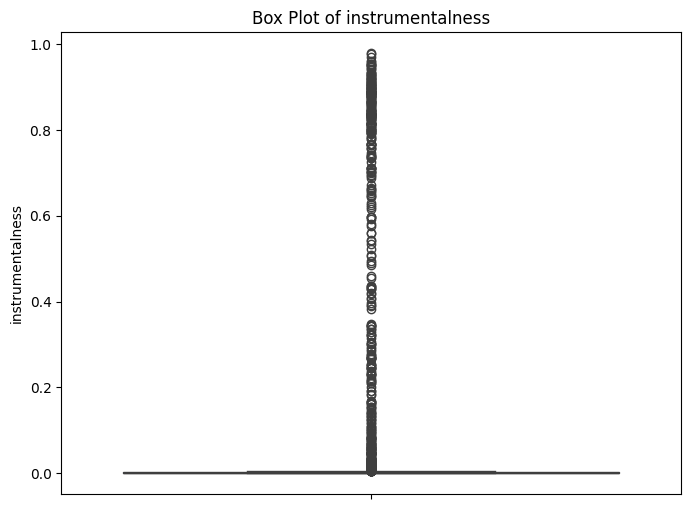

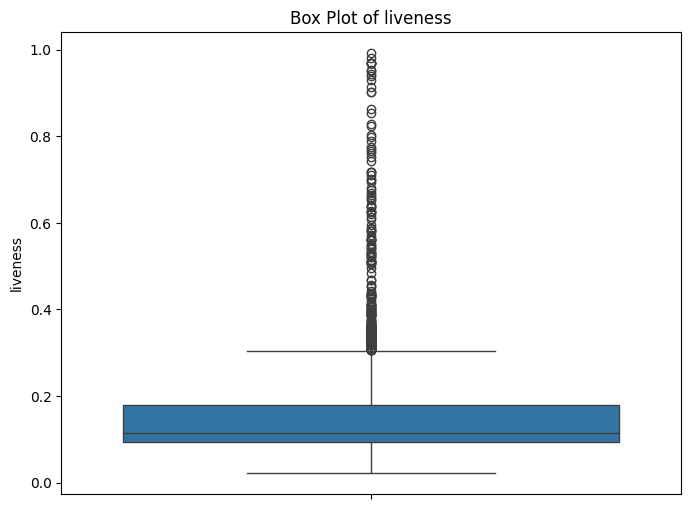

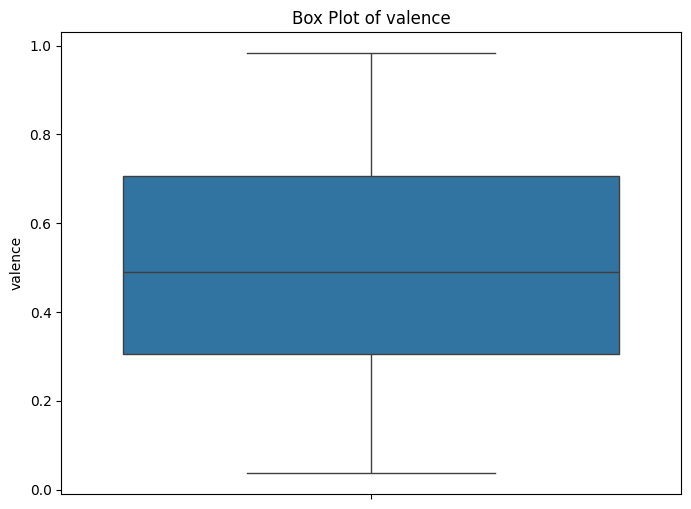

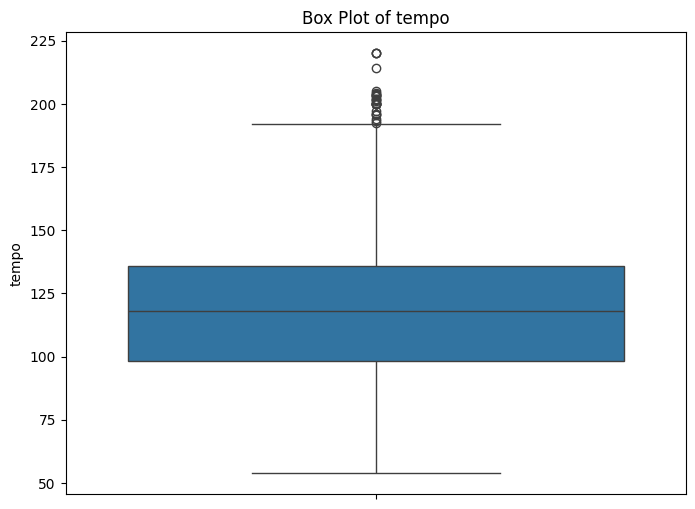

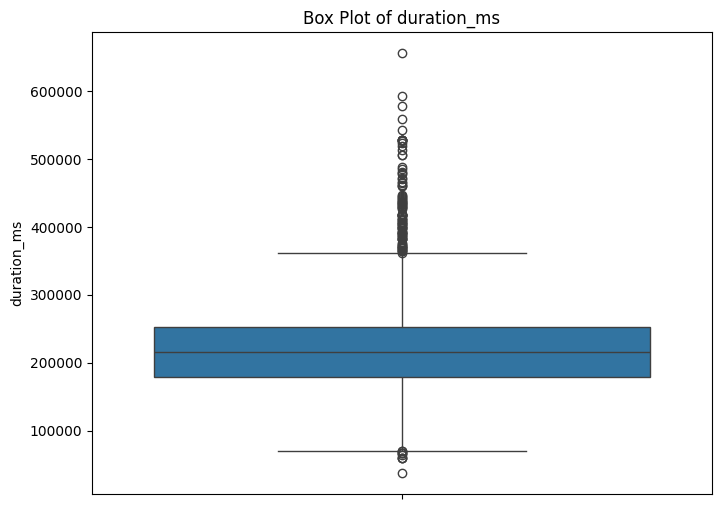

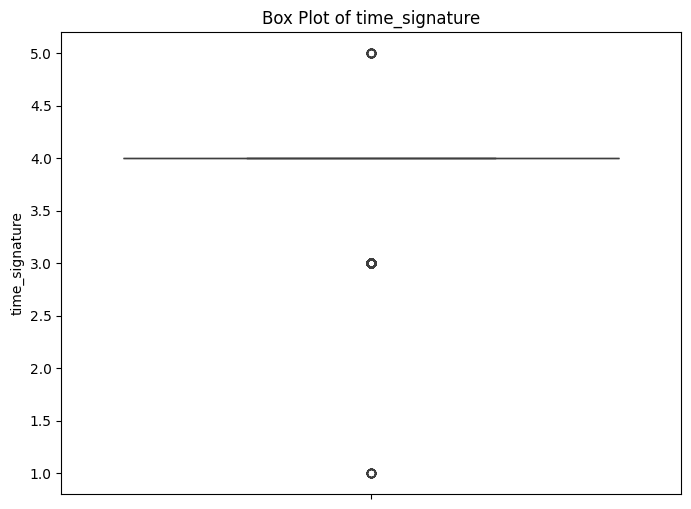

In [18]:
# plotting Box plot
numeric_cols = spotify.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(y=df[col])  # Use sns.boxplot for box plots
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [19]:

# Function to remove outliers using IQR for a specific column
def remove_outliers_iqr(spotify, column):
    Q1 = spotify[column].quantile(0.25)
    Q3 = spotify[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    spotify_filtered = spotify[(spotify[column] >= lower_bound) & (spotify[column] <= upper_bound)]
    return spotify_filtered

# List of columns to check for outliers
columns_to_check = [
    'danceability', 'loudness', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'time_signature', 'tempo', 
    'duration_ms', 'track_popularity'
]

# Iterate over all specified columns and apply the outlier removal function
spotify_no_outliers = spotify.copy()  # Make a copy to avoid modifying the original dataframe
for col in columns_to_check:
    spotify_no_outliers = remove_outliers_iqr(spotify_no_outliers, col)

# Check the shape of the DataFrame after outlier removal
print(spotify_no_outliers.shape)



(1177, 20)


In [20]:
# final data after removing outliers

spotify_no_outliers.head()

,track_name,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2,Aaj Bhi 2,Vishal Mishra,78,bollywood,India,Aaj Bhi 2,69,0.452,0.328,1,-11.344,1,0.0300,0.665,0.000005,0.1040,0.258,102.084,259057,4
3,"Agar Tum Saath Ho (From ""Tamasha"")",Alka Yagnik,81,bollywood,India,Love Forever With Arijit Singh,69,0.562,0.519,3,-8.744,1,0.0326,0.557,0.000268,0.1720,0.415,122.925,341055,4
4,"Tenu Sang Rakhna (From ""Jigra"")",Achint,57,bollywood,India,"Tenu Sang Rakhna (From ""Jigra"")",61,0.604,0.354,2,-6.716,1,0.0249,0.845,0.000148,0.0921,0.277,110.036,249818,4
7,Ae Dil Hai Mushkil Title Track,Pritam,89,bollywood,India,Ae Dil Hai Mushkil (Original Motion Picture So...,70,0.495,0.654,3,-6.639,0,0.0679,0.713,0.000000,0.1650,0.350,123.896,269032,4
8,"Vekh Sohneyaa - From ""Call Me Bae""",Bombay the Artist,56,bollywood,India,"Vekh Sohneyaa (From ""Call Me Bae"")",68,0.715,0.673,4,-4.860,0,0.0593,0.273,0.000000,0.1460,0.615,114.968,216465,4


## **Exploratory Data Analysis (EDA)**

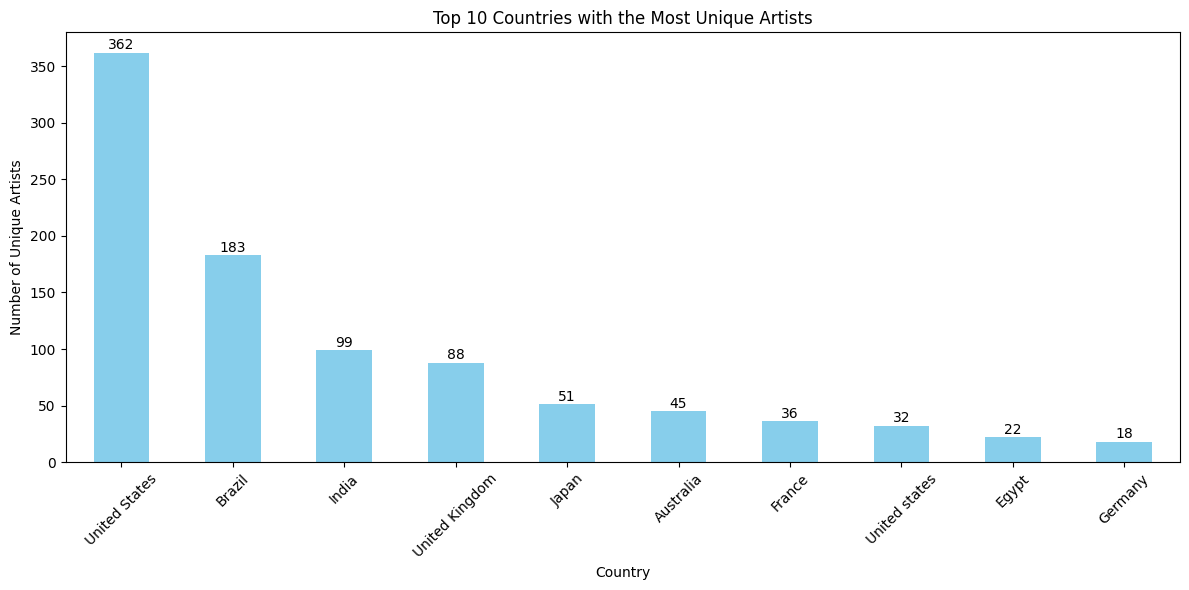

In [21]:
# Count the number of unique artists per country
artist_count_by_country = spotify.groupby('country_name')['artist_name'].nunique().sort_values(ascending=False)

# Plot the combined bar chart for the top 10 countries with the most unique artists
plt.figure(figsize=(12, 6))
artist_count_by_country.head(10).plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.title('Top 10 Countries with the Most Unique Artists')
plt.xlabel('Country')
plt.ylabel('Number of Unique Artists')
plt.xticks(rotation=45)

# Display the count of unique artists on top of the bars
for i, value in enumerate(artist_count_by_country.head(10)):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# separate numerical and categorical after removing time_signature column

# Drop the 'time_signature' column if it exists
if 'time_signature' in spotify_no_outliers.columns:
    spotify_no_outliers = spotify_no_outliers.drop('time_signature', axis=1)

# Separate numerical and categorical features
numerical_features = spotify_no_outliers.select_dtypes(include=np.number).columns
categorical_features = spotify_no_outliers.select_dtypes(exclude=np.number).columns

# Print or further process the separated features
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

# Example: Create new DataFrames for numerical and categorical features
numerical_spotify = spotify_no_outliers[numerical_features]
categorical_spotify = spotify_no_outliers[categorical_features]

print(numerical_spotify.head())
print(categorical_spotify.head())

Numerical features: Index(['artist_popularity', 'track_popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')
Categorical features: Index(['track_name', 'artist_name', 'artist_genres', 'country_name',
       'album_name'],
      dtype='object')
   artist_popularity  track_popularity  danceability  energy  key  loudness  \
2                 78                69         0.452   0.328    1   -11.344   
3                 81                69         0.562   0.519    3    -8.744   
4                 57                61         0.604   0.354    2    -6.716   
7                 89                70         0.495   0.654    3    -6.639   
8                 56                68         0.715   0.673    4    -4.860   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
2     1       0.0300         0.665          0.000005    0.1

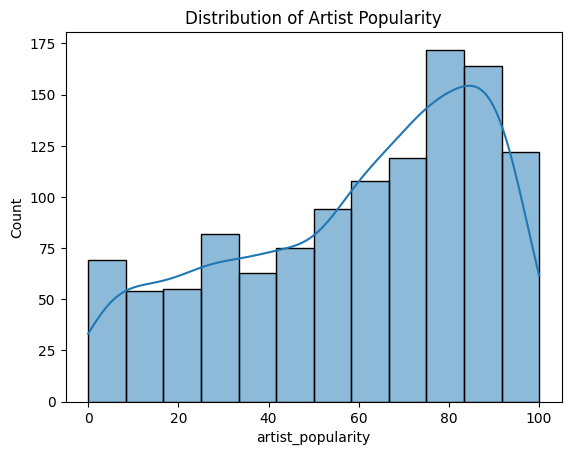

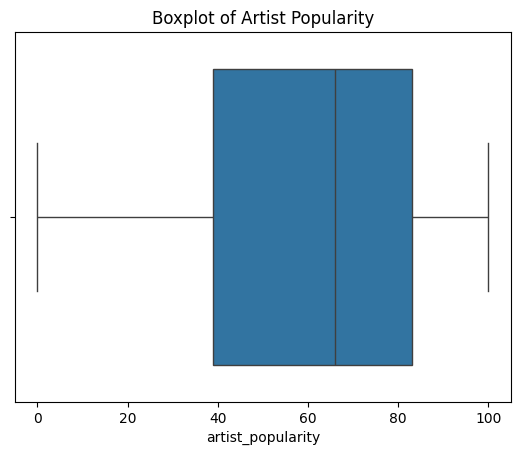

In [23]:
# Example: Visualizing the distribution of artist popularity
sns.histplot(spotify_no_outliers['artist_popularity'], kde=True)
plt.title('Distribution of Artist Popularity')
plt.show()

# Boxplot for artist popularity
sns.boxplot(x=spotify_no_outliers['artist_popularity'])
plt.title('Boxplot of Artist Popularity')
plt.show()


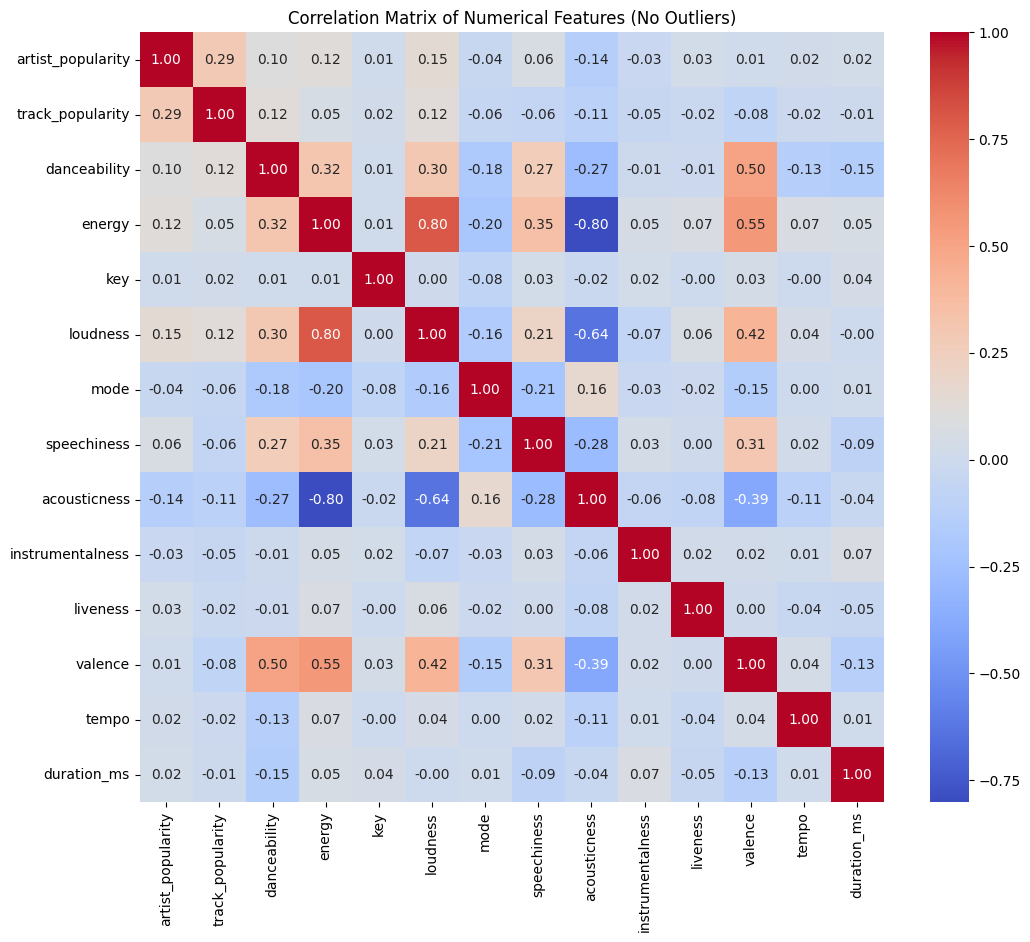

In [24]:
# Calculate the correlation matrix for numerical features in spotify_no_outliers
numerical_spotify_no_outliers = spotify_no_outliers.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_spotify_no_outliers.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (No Outliers)')
plt.show()

In [25]:
# Calculate the correlation matrix for numerical features in spotify_no_outliers
numerical_spotify_no_outliers = spotify_no_outliers.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_spotify_no_outliers.corr()

# Get the absolute correlation values for 'track_popularity' and sort them
correlation_with_popularity = correlation_matrix['track_popularity'].abs().sort_values(ascending=False)

# Display the correlation values
print(correlation_with_popularity)

track_popularity     1.000000
artist_popularity    0.290006
loudness             0.120844
danceability         0.120702
acousticness         0.107754
valence              0.081506
speechiness          0.057225
mode                 0.055120
energy               0.053824
instrumentalness     0.047217
liveness             0.020520
key                  0.020356
tempo                0.018604
duration_ms          0.012904
Name: track_popularity, dtype: float64


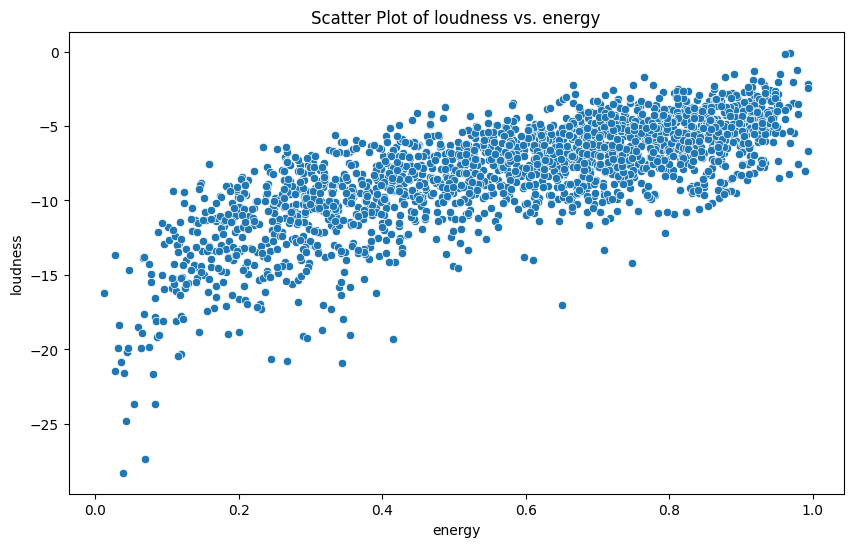

In [26]:
# Set the dependent variable 
y = spotify['loudness']

# Choose an independent variable 
x = spotify['energy']  

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, data=spotify)
plt.title('Scatter Plot of loudness vs. energy')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

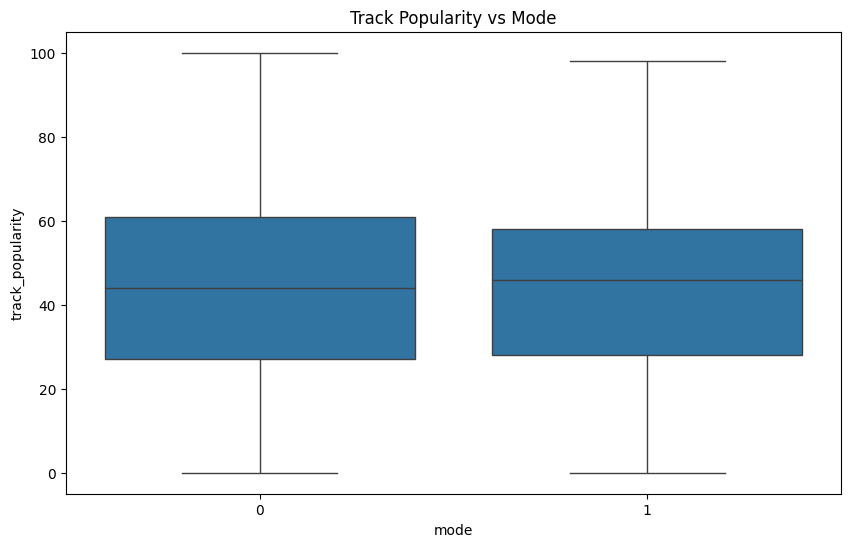

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='track_popularity', data=spotify)
plt.title('Track Popularity vs Mode')
plt.show()

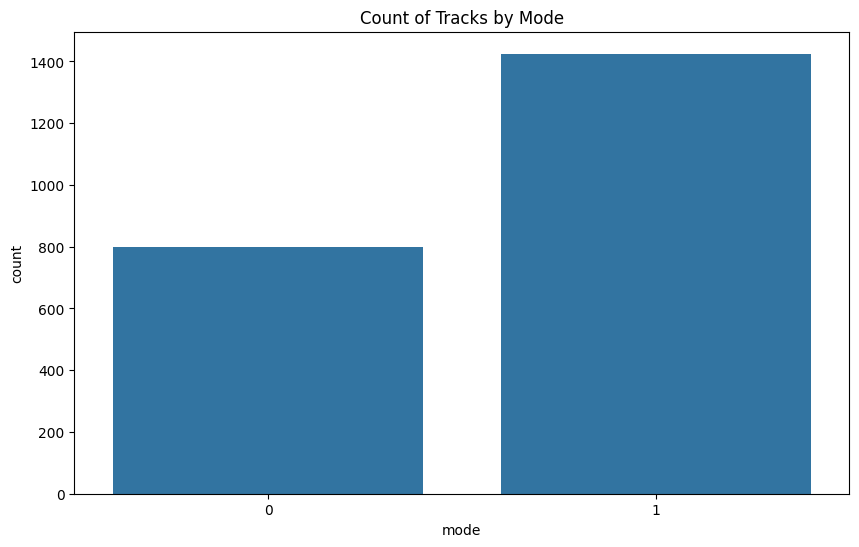

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mode', data=spotify)
plt.title('Count of Tracks by Mode')
plt.show()


In [29]:
spotify_no_outliers.columns

Index(['track_name', 'artist_name', 'artist_popularity', 'artist_genres',
       'country_name', 'album_name', 'track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [30]:
spotify_no_outliers.describe() #summary of the statistical properties of numerical columns in the DataFrame

,artist_popularity,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,59.547154,47.484282,0.613598,0.548810,5.067120,-7.652804,0.683942,0.045884,0.432164,0.000308,0.128631,0.498331,116.881681,215764.979609
std,27.736639,21.619899,0.136645,0.233113,3.583752,3.011698,0.465133,0.020002,0.324868,0.000944,0.053878,0.235628,26.417263,46616.078909
min,0.000000,0.000000,0.228000,0.011900,0.000000,-16.177000,0.000000,0.023200,0.000006,0.000000,0.021900,0.056800,53.845000,86984.000000
25%,39.000000,30.000000,0.516000,0.340000,2.000000,-9.573000,0.000000,0.031300,0.108000,0.000000,0.095100,0.308000,96.900000,181482.000000
50%,66.000000,50.000000,0.620000,0.572000,5.000000,-7.050000,1.000000,0.038500,0.395000,0.000001,0.112000,0.472000,115.067000,214860.000000
75%,83.000000,62.000000,0.715000,0.744000,8.000000,-5.416000,1.000000,0.054200,0.759000,0.000063,0.147000,0.688000,133.737000,246786.000000
max,100.000000,95.000000,0.960000,0.972000,11.000000,-1.294000,1.000000,0.112000,0.972000,0.006970,0.301000,0.975000,187.057000,346291.000000


## **Statistical Analysis**

### **Example 1:**

**ANOVA (Analysis of Variance) Test** 

**Hypothesis Statement: whether there's a difference in track popularity across different genres**

- Null Hypothesis:  There is no significant difference in track popularity across the different genres.
- Alternative hypothesis : There is a significant difference in track popularity across different genres.

 We can use **ANOVA (Analysis of Variance)** beacuse it is used to compare means across three or more groups.

In [31]:
import pandas as pd
from scipy import stats

# Group the data by genre
genres = spotify_no_outliers['artist_genres'].unique()  # This gives a list of all unique genres in your dataset

# Create a list to hold the track popularity for each genre
track_popularity_by_genre = []

# Loop through each genre and get the track popularity values
for genre in genres:
    track_popularity_by_genre.append(spotify_no_outliers[spotify_no_outliers['artist_genres'] == genre]['track_popularity'])

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(*track_popularity_by_genre)

# Print the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: Track popularity differs across genres.")
else:
    print("Fail to reject the null hypothesis: Track popularity does not differ across genres.")


F-statistic: 27.876408398911984
P-value: 2.9891657791355696e-81
Reject the null hypothesis: Track popularity differs across genres.


### **Example 2:**

**Pearson Correlation test**

- Null Hypothesis : There is no correlation between track popularity and the feature.
- Alternative Hypothesis : There is a significant correlation between track popularity and the feature.

The **Pearson correlation test** is a statistical method used to measure the linear relationship between two continuous variables

In [32]:
from scipy.stats import pearsonr

features = ['loudness', 'danceability', 'energy', 'acousticness']  #  features

# For each feature, calculate Pearson correlation with track popularity
for feature in features:
    corr, p_value = pearsonr(spotify_no_outliers[feature], spotify_no_outliers['track_popularity'])
    print(f"Correlation between {feature} and track popularity: {corr}, p-value: {p_value}")
    
    # Interpret the results
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant relationship between {feature} and track popularity.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant relationship between {feature} and track popularity.")


Correlation between loudness and track popularity: 0.12084407864081562, p-value: 3.228964251822671e-05
Reject the null hypothesis: There is a significant relationship between loudness and track popularity.
Correlation between danceability and track popularity: 0.12070188594196099, p-value: 3.299288607374593e-05
Reject the null hypothesis: There is a significant relationship between danceability and track popularity.
Correlation between energy and track popularity: 0.05382414060656092, p-value: 0.06490030159980965
Fail to reject the null hypothesis: There is no significant relationship between energy and track popularity.
Correlation between acousticness and track popularity: -0.10775383601878671, p-value: 0.00021254658934488727
Reject the null hypothesis: There is a significant relationship between acousticness and track popularity.


- Songs with higher loudness tend to be slightly more popular.
-  Songs with higher danceability tend to be slightly more popular.
- Energy has a negligible relationship with track popularity.
- Songs with higher acousticness tend to be slightly less popular.

### **Example 3:**

**T Test**

- Null Hypothesis: There is no difference in danceability between popular and unpopular songs.
- Alternative Hypothesis: Popular songs have higher danceability than unpopular songs.

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Define popular and unpopular songs
popularity_threshold = 48  
spotify_no_outliers['popularity_category'] = spotify_no_outliers['track_popularity'].apply(lambda x: 'Popular' if x >= popularity_threshold else 'Unpopular')

# Separate data into two groups
popular_songs = spotify_no_outliers[spotify_no_outliers['popularity_category'] == 'Popular']
unpopular_songs = spotify_no_outliers[spotify_no_outliers['popularity_category'] == 'Unpopular']

# Calculate sample statistics
mean_popular = np.mean(popular_songs['danceability'])
mean_unpopular = np.mean(unpopular_songs['danceability'])
std_popular = np.std(popular_songs['danceability'], ddof=1)
std_unpopular = np.std(unpopular_songs['danceability'], ddof=1)
n_popular = len(popular_songs)
n_unpopular = len(unpopular_songs)

# Compute standard error
se = np.sqrt((std_popular**2 / n_popular) + (std_unpopular**2 / n_unpopular))

# Compute t-statistic
t_stat = (mean_popular - mean_unpopular) / se

# Compute degrees of freedom 
df = ( (std_popular**2 / n_popular + std_unpopular**2 / n_unpopular) ** 2 ) / ( ((std_popular**2 / n_popular) ** 2) / (n_popular - 1) + ((std_unpopular**2 / n_unpopular) ** 2) / (n_unpopular - 1) )

# Compute one-tailed p-value
p_value = 1 - t.cdf(t_stat, df)

# Results
print("One-Tailed Danceability t-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Popular songs have significantly higher danceability than unpopular songs.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that popular songs have higher danceability.")


One-Tailed Danceability t-test:
t-statistic: 2.6409
Degrees of freedom: 1157.4482
p-value: 0.0042
Reject the null hypothesis: Popular songs have significantly higher danceability than unpopular songs.


## **Feature Selection**

### **Method 1: Filter Method (Chi-Square)**

In [34]:
categorical_columns = ['artist_genres', 'country_name', 'album_name','track_name','artist_name']  # Add categorical columns here
spotify_encoded = pd.get_dummies(spotify_no_outliers[categorical_columns], drop_first=True)


H0: There is no significant relationship between features and Popularity


Ha: There is significant relationship between feature and popuarity.

In [35]:
from scipy.stats import chi2_contingency

# Loop through each categorical feature
for feature in categorical_columns:
    # Create a contingency table for each feature and target variable
    contingency_table = pd.crosstab(spotify_no_outliers[feature], spotify_no_outliers['popularity_category'])
    
    # Perform Chi-Square Test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f"Chi-Square for {feature} vs popularity_category: p-value = {p_value}")
    
    # Interpretation based on p-value
    if p_value < 0.05:
        print(f"Reject the null hypothesis: There is a significant relationship between {feature} and  popularity.")
    else:
        print(f"Fail to reject the null hypothesis: No significant relationship between {feature} and popularity.")


Chi-Square for artist_genres vs popularity_category: p-value = 4.037985756033505e-47
Reject the null hypothesis: There is a significant relationship between artist_genres and  popularity.
Chi-Square for country_name vs popularity_category: p-value = 3.6724078947458966e-33
Reject the null hypothesis: There is a significant relationship between country_name and  popularity.
Chi-Square for album_name vs popularity_category: p-value = 1.6076002084069228e-05
Reject the null hypothesis: There is a significant relationship between album_name and  popularity.
Chi-Square for track_name vs popularity_category: p-value = 0.05178815111679317
Fail to reject the null hypothesis: No significant relationship between track_name and popularity.
Chi-Square for artist_name vs popularity_category: p-value = 2.3856639187831007e-19
Reject the null hypothesis: There is a significant relationship between artist_name and  popularity.


### **Method 2: Wrapper method**

RFE works by recursively removing features and building a model on the remaining features. It uses model performance to evaluate which features are most important.

Wrapper methods evaluate subsets of features by training a model multiple times and iteratively eliminating less important features.

In [36]:
# Drop the 'track_name' column since it does not have a significant relationship with track popularity
spotify_no_outliers = spotify_no_outliers.drop(columns=['track_name'])

# Check the shape after dropping the column
print("Shape after dropping 'track_name':", spotify_no_outliers.shape)



Shape after dropping 'track_name': (1177, 19)


In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
categorical_columns = ['artist_name', 'artist_genres', 'country_name', 'album_name']  # list your categorical columns

for col in categorical_columns:
    spotify_no_outliers[col] = label_encoder.fit_transform(spotify_no_outliers[col])

In [38]:
spotify_no_outliers #check the dataset after encording

,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_category
2,515,78,5,13,35,69,0.452,0.328,1,-11.344,1,0.0300,0.6650,0.000005,0.1040,0.258,102.084,259057,Popular
3,26,81,5,13,476,69,0.562,0.519,3,-8.744,1,0.0326,0.5570,0.000268,0.1720,0.415,122.925,341055,Popular
4,13,57,5,13,704,61,0.604,0.354,2,-6.716,1,0.0249,0.8450,0.000148,0.0921,0.277,110.036,249818,Popular
7,391,89,5,13,45,70,0.495,0.654,3,-6.639,0,0.0679,0.7130,0.000000,0.1650,0.350,123.896,269032,Popular
8,86,56,5,13,786,68,0.715,0.673,4,-4.860,0,0.0593,0.2730,0.000000,0.1460,0.615,114.968,216465,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,341,12,1,4,508,21,0.682,0.815,11,-7.550,0,0.0620,0.5280,0.000000,0.0995,0.964,106.068,152372,Unpopular
2400,263,81,1,4,238,63,0.761,0.488,9,-7.326,1,0.0430,0.1990,0.002360,0.0864,0.682,100.024,217146,Popular
2403,206,11,1,4,9,53,0.851,0.414,11,-8.518,0,0.0314,0.0498,0.001350,0.1100,0.581,102.807,216080,Popular
2407,225,84,1,4,67,20,0.703,0.859,6,-3.991,1,0.0752,0.2220,0.000000,0.1740,0.867,82.069,228115,Unpopular


In [39]:
# Drop categorical and target columns from the feature set
X = spotify_no_outliers.drop(columns=['track_popularity', 'popularity_category'])

# Define the target variable 
y = spotify_no_outliers['track_popularity']  

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor  

# Initialize the model 
model = RandomForestRegressor()

# Initialize RFE
rfe = RFE(model, n_features_to_select=15)  # Select top 15 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['artist_name', 'artist_popularity', 'artist_genres', 'country_name',
       'album_name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


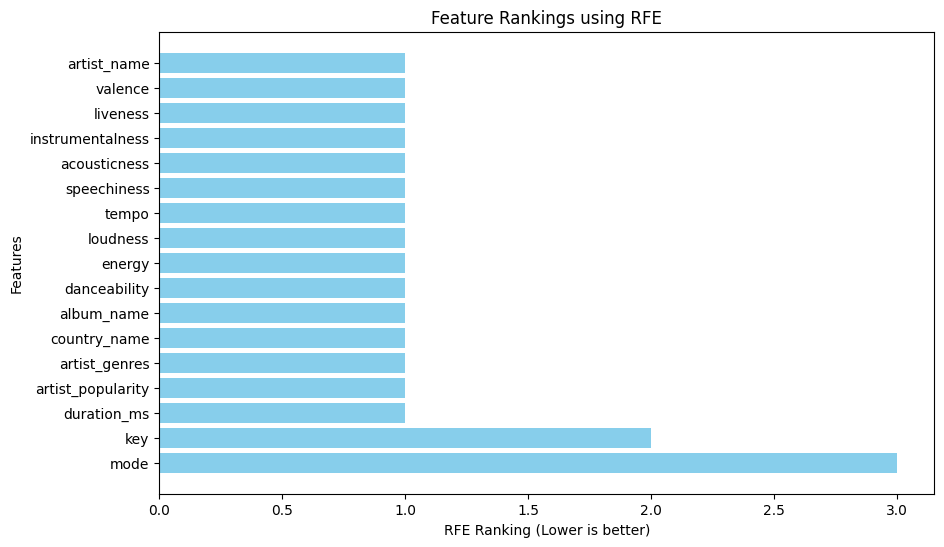

In [42]:
# Get feature rankings
feature_ranking = rfe.ranking_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})

# Sort by ranking (lower ranking means more important)
feature_importance_df = feature_importance_df.sort_values(by='Ranking')

# Plot the rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Ranking'], color='skyblue')
plt.xlabel('RFE Ranking (Lower is better)')
plt.ylabel('Features')
plt.title('Feature Rankings using RFE')
plt.gca().invert_yaxis()  # Flip so most important features are on top
plt.show()

## **Method 3: Embedded method**

Top 15 Features by Importance:
              Feature  Importance
2       artist_genres    0.283802
1   artist_popularity    0.135119
16        duration_ms    0.065330
4          album_name    0.051526
10        speechiness    0.051279
15              tempo    0.049827
0         artist_name    0.047438
14            valence    0.047122
5        danceability    0.043566
6              energy    0.042539
13           liveness    0.040959
11       acousticness    0.040941
8            loudness    0.037128
3        country_name    0.019355
12   instrumentalness    0.019323


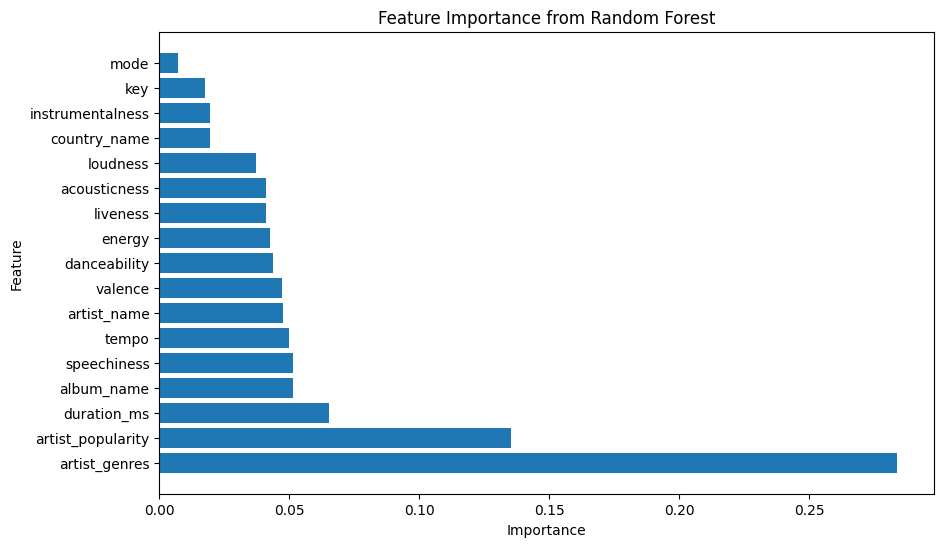

Selected top 15 features: ['artist_genres', 'artist_popularity', 'duration_ms', 'album_name', 'speechiness', 'tempo', 'artist_name', 'valence', 'danceability', 'energy', 'liveness', 'acousticness', 'loudness', 'country_name', 'instrumentalness']


In [43]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

#  X and y
X = spotify_no_outliers.drop(columns=['track_popularity', 'popularity_category'])
y = spotify_no_outliers['track_popularity']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top 15 Features by Importance:")
print(feature_importance_df.head(15))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

# select top features to train the model 
top_15_features = feature_importance_df['Feature'].head(15).tolist()
print(f"Selected top 15 features: {top_15_features}")


## **Build Model**

- First done with pycaret(without hyperparameter tuning)
- Second done with pycaret but did hyperparameter tuning
- Thrid, chose model indivudually and used hyperparameter to build model with best r square possible


In [44]:
spotify_no_outliers #check the dataset first

,artist_name,artist_popularity,artist_genres,country_name,album_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_category
2,515,78,5,13,35,69,0.452,0.328,1,-11.344,1,0.0300,0.6650,0.000005,0.1040,0.258,102.084,259057,Popular
3,26,81,5,13,476,69,0.562,0.519,3,-8.744,1,0.0326,0.5570,0.000268,0.1720,0.415,122.925,341055,Popular
4,13,57,5,13,704,61,0.604,0.354,2,-6.716,1,0.0249,0.8450,0.000148,0.0921,0.277,110.036,249818,Popular
7,391,89,5,13,45,70,0.495,0.654,3,-6.639,0,0.0679,0.7130,0.000000,0.1650,0.350,123.896,269032,Popular
8,86,56,5,13,786,68,0.715,0.673,4,-4.860,0,0.0593,0.2730,0.000000,0.1460,0.615,114.968,216465,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,341,12,1,4,508,21,0.682,0.815,11,-7.550,0,0.0620,0.5280,0.000000,0.0995,0.964,106.068,152372,Unpopular
2400,263,81,1,4,238,63,0.761,0.488,9,-7.326,1,0.0430,0.1990,0.002360,0.0864,0.682,100.024,217146,Popular
2403,206,11,1,4,9,53,0.851,0.414,11,-8.518,0,0.0314,0.0498,0.001350,0.1100,0.581,102.807,216080,Popular
2407,225,84,1,4,67,20,0.703,0.859,6,-3.991,1,0.0752,0.2220,0.000000,0.1740,0.867,82.069,228115,Unpopular


In [45]:
spotify_no_outliers = spotify_no_outliers.drop(columns=['popularity_category'], errors='ignore') #drop the popularity category column

### **Without hyperparameter tuning**

In [46]:
from pycaret.regression import *


# Initialize the setup in PyCaret. Specify both categorical and numerical features.
exp1 = setup(data=spotify_no_outliers, target='track_popularity',
             categorical_features=['artist_name','country_name'],
             numeric_features=['danceability', 'loudness', 'speechiness', 'acousticness'],
             session_id=42)  



# Compare models to find the best one
best_model = compare_models(fold = 5)

# Tune the best model to find the optimal hyperparameters
tuned_model = tune_model(best_model)

# Evaluate the tuned model's performance
evaluate_model(tuned_model)

# Make predictions on the data using the tuned model
predictions = predict_model(tuned_model)

# Finalize the model
final_model = finalize_model(tuned_model)

#save the final model
save_model(final_model, 'spotify_final_model')

,Description,Value
0,Session id,42
1,Target,track_popularity
2,Target type,Regression
3,Original data shape,"(1177, 18)"
4,Transformed data shape,"(1177, 18)"
5,Transformed train set shape,"(823, 18)"
6,Transformed test set shape,"(354, 18)"
7,Numeric features,4
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.4998,261.7095,16.1403,0.4330,0.7415,0.4766,0.1160
rf,Random Forest Regressor,11.6339,262.7658,16.1947,0.4296,0.7597,0.4828,0.2180
gbr,Gradient Boosting Regressor,12.2399,269.8711,16.4211,0.4135,0.7916,0.4983,0.1240
lightgbm,Light Gradient Boosting Machine,11.9316,273.1950,16.4943,0.4075,0.7437,0.4949,0.1700
xgboost,Extreme Gradient Boosting,12.0770,289.8119,16.9955,0.3714,0.7275,0.5022,0.1840
lr,Linear Regression,13.8241,327.1912,18.0769,0.2885,0.8651,0.5375,1.4600
ridge,Ridge Regression,14.0165,331.8484,18.2087,0.2784,0.8687,0.5441,0.0220
br,Bayesian Ridge,14.7205,342.9209,18.5096,0.2545,0.8755,0.5657,0.0300
en,Elastic Net,14.7256,343.2524,18.5187,0.2537,0.8755,0.5666,0.0300
llar,Lasso Least Angle Regression,14.7296,343.4154,18.5232,0.2534,0.8754,0.5672,0.0340


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.5048,269.2623,16.4092,0.3437,0.6820,0.3081
1,13.3030,265.0618,16.2807,0.3889,0.7443,0.3340
2,13.4503,279.6604,16.7231,0.4453,0.7143,0.5548
3,13.0508,292.1269,17.0917,0.2800,1.0394,0.2781
4,13.6019,286.5636,16.9282,0.4336,1.0493,0.6571
5,13.0131,307.0922,17.5240,0.3136,0.7603,0.8781
6,13.2465,289.1691,17.0050,0.3731,0.8579,0.3284
7,14.3205,286.5011,16.9263,0.3880,0.7491,0.3218
8,11.7016,241.8469,15.5514,0.3769,0.5889,0.8753


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,11.5492,288.9901,16.9997,0.3928,0.8388,1.1911


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['danceability', 'loudness',
                                              'speechiness', 'acousticness'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['artist_name', 'country_name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['artist_name', 'country_name'],
                                     transformer=TargetEncoder(cols=[],
                                                               handle_missing='return_nan'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=42))]),
 'spotify_final_model.pkl')

### **With hyperparameter tuning - Model Optimization**

In [47]:
from pycaret.regression import *


# Initialize the setup in PyCaret. Specify both categorical and numerical features.
exp1 = setup(data=spotify_no_outliers, target='track_popularity',
             categorical_features=['artist_name','country_name','artist_genres'],
             numeric_features=['duration_ms', 'speechiness', 'danceability', 
                               'acousticness', 'mode', 'liveness', 'energy', 
                               'valence', 'tempo', 'key', 'loudness'],
             session_id=7000)




# Compare models to find the best one
best_model = compare_models(fold = 10)

# Tune the best model to find the optimal hyperparameters
# Specify hyperparameter grid (for a RandomForest model as an example)
# Example custom grid for RandomForest
custom_grid = {'n_estimators': [500],
               'max_depth': [20],
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'max_features': ['auto', 'sqrt', 'log2'],
               'bootstrap': [True, False]}
tuned_model = tune_model(best_model, custom_grid=custom_grid)



# Evaluate the tuned model's performance
evaluate_model(tuned_model)

# Make predictions on the data using the tuned model
predictions = predict_model(tuned_model)

# Finalize the model
final_model = finalize_model(tuned_model)

#save the final model
save_model(final_model, 'spotify_final_model')


,Description,Value
0,Session id,7000
1,Target,track_popularity
2,Target type,Regression
3,Original data shape,"(1177, 18)"
4,Transformed data shape,"(1177, 35)"
5,Transformed train set shape,"(823, 35)"
6,Transformed test set shape,"(354, 35)"
7,Numeric features,11
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,12.4278,298.1714,17.0941,0.3616,0.8135,0.7661,0.2610
gbr,Gradient Boosting Regressor,12.8770,306.1054,17.3316,0.3517,0.8435,0.7725,0.1360
et,Extra Trees Regressor,12.3082,303.5416,17.2649,0.3488,0.7813,0.7681,0.1560
lightgbm,Light Gradient Boosting Machine,12.7949,312.4588,17.4904,0.3328,0.8031,0.7650,0.1610
lr,Linear Regression,13.6092,325.4764,17.9308,0.3033,0.8861,0.7424,0.0700
ridge,Ridge Regression,13.6064,327.2671,17.9899,0.3000,0.8877,0.7512,0.0280
br,Bayesian Ridge,13.6775,330.0114,18.0620,0.2951,0.8895,0.7560,0.0240
xgboost,Extreme Gradient Boosting,13.0454,337.4259,18.2048,0.2727,0.7842,0.7995,0.1280
lasso,Lasso Regression,14.9840,367.4915,19.0687,0.2170,0.9051,0.7615,0.0260
llar,Lasso Least Angle Regression,14.9840,367.4904,19.0686,0.2170,0.9051,0.7615,0.0290


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.0056,305.5192,17.4791,0.4348,0.9450,0.3092
1,14.0920,388.3614,19.7069,0.2732,0.8274,0.6317
2,10.3562,195.5787,13.9849,0.5129,0.8332,0.1941
3,10.9598,221.5837,14.8857,0.4574,0.7035,1.0639
4,14.2362,388.6995,19.7155,0.1407,0.9231,1.2021
5,12.1126,250.6859,15.8331,0.5025,0.6946,1.2670
6,11.7620,227.3391,15.0778,0.2280,0.4855,0.2380
7,11.4455,210.9574,14.5244,0.5302,0.7585,0.2545
8,14.5841,389.4749,19.7351,0.2549,1.0218,1.3438


Fitting 10 folds for each of 6 candidates, totalling 60 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,11.2897,211.5040,14.5432,0.5246,0.7856,0.5504


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['duration_ms', 'speechiness',
                                              'danceability', 'acousticness',
                                              'mode', 'liveness', 'energy',
                                              'valence', 'tempo', 'key',
                                              'loudness'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['artist_name', 'country_name',
                                              'artist_genres'],
                                     transfor...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['

#### **Selecting model individually to build the model**

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Load Data (Assuming spotify_no_outliers is already loaded)
selected_features = ['artist_name', 'country_name', 'artist_genres', 'mode', 'duration_ms', 'speechiness', 'energy', 'valence', 'danceability', 'acousticness', 'tempo', 'liveness', 'key']
X = spotify_no_outliers[selected_features]
y = spotify_no_outliers['track_popularity']

# Encode Categorical Features
encoder = TargetEncoder(cols=['artist_genres', 'artist_name', 'country_name'])
X = encoder.fit_transform(X, y)

# Feature Engineering
X['dance_energy'] = X['danceability'] * X['energy']
X['valence_tempo'] = X['valence'] * X['tempo']
X['speechiness_acoustic'] = X['speechiness'] * X['acousticness']

# Drop Low-Importance Features
X = X.drop(['mode', 'key'], axis=1)

# Normalize Skewed Features
pt = PowerTransformer(method='yeo-johnson')
skewed_features = ['duration_ms', 'tempo', 'speechiness', 'energy', 'liveness']
X[skewed_features] = pt.fit_transform(X[skewed_features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest
param_dist = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_


# Evaluate Random Forest
rf_pred = best_rf.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
print(f'Optimized Random Forest R²: {r2_rf:.4f}, MSE: {mse_rf:.4f}')

# Train and Evaluate XGBoost
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost R²: {r2_xgb:.4f}, MSE: {mse_xgb:.4f}')

# Train and Evaluate LightGBM
lgb_model = LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
r2_lgb = r2_score(y_test, lgb_pred)
mse_lgb = mean_squared_error(y_test, lgb_pred)
print(f'LightGBM R²: {r2_lgb:.4f}, MSE: {mse_lgb:.4f}')


Optimized Random Forest R²: 0.7649, MSE: 105.9138
XGBoost R²: 0.7307, MSE: 121.3343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3002
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 14
[LightGBM] [Info] Start training from score 47.286929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

### **Graphically showing the comparison of all three models**

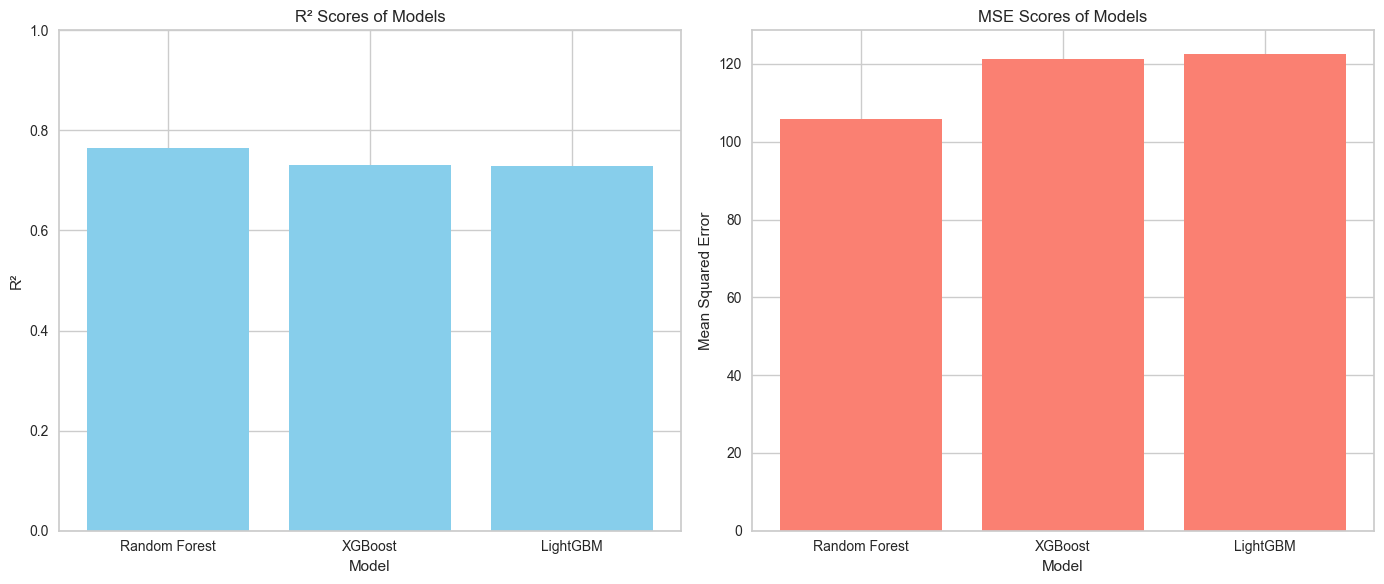

In [50]:
#Graphically showing the comparison of all three models
import matplotlib.pyplot as plt
import numpy as np

# Results
models = ['Random Forest', 'XGBoost', 'LightGBM']
r2_scores = [r2_rf, r2_xgb, r2_lgb]
mse_scores = [mse_rf, mse_xgb, mse_lgb]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# R² Plot
ax[0].bar(models, r2_scores, color='skyblue')
ax[0].set_title('R² Scores of Models')
ax[0].set_ylabel('R²')
ax[0].set_ylim(0, 1)
ax[0].set_xlabel('Model')

# MSE Plot
ax[1].bar(models, mse_scores, color='salmon')
ax[1].set_title('MSE Scores of Models')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_xlabel('Model')

# Show the plot
plt.tight_layout()
plt.show()


## **Save the optimized model for the Deployment**

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer, StandardScaler
from category_encoders import TargetEncoder
import joblib

# Load Data
selected_features = ['artist_name', 'country_name', 'artist_genres', 'speechiness', 'energy', 
                     'valence', 'danceability', 'acousticness', 'tempo', 'liveness', 'duration_ms']
X = spotify_no_outliers[selected_features]
y = spotify_no_outliers['track_popularity']

# Encode categorical features
encoder = TargetEncoder(cols=['artist_name', 'country_name', 'artist_genres'])
X = encoder.fit_transform(X, y)

# Feature engineering
X['dance_energy'] = X['danceability'] * X['energy']
X['valence_tempo'] = X['valence'] * X['tempo']
X['speechiness_acoustic'] = X['speechiness'] * X['acousticness']

# Normalize skewed features using PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
skewed_features = ['tempo', 'speechiness', 'energy', 'liveness', 'duration_ms']
X[skewed_features] = pt.fit_transform(X[skewed_features])

# Scale all features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, scoring='r2')
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Evaluate
y_pred_scaled = best_rf.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

r2_rf = r2_score(y_test_original, y_pred)
mse_rf = mean_squared_error(y_test_original, y_pred)
print(f'Optimized Random Forest R²: {r2_rf:.4f}, MSE: {mse_rf:.4f}')

# Save model and transformers
joblib.dump(best_rf, 'best_rf_model.pkl')
joblib.dump(encoder, 'target_encoder.pkl')
joblib.dump(pt, 'power_transformer.pkl')
joblib.dump(scaler_X, 'feature_scaler.pkl')
joblib.dump(scaler_y, 'target_scaler.pkl')

Optimized Random Forest R²: 0.7694, MSE: 103.8957


['target_scaler.pkl']

In [52]:
print("Features used in training:", X.shape[1])  
print("Model expects:", best_rf.n_features_in_)  

Features used in training: 14
Model expects: 14


In [76]:
from sklearn.metrics import r2_score

# Predict
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²:  {r2_test:.4f}")

Train R²: 0.8873
Test R²:  0.7694
